In [9]:
import pandas as pd
import numpy as np
import math
from scipy import stats
import matplotlib.pyplot as plt

## Context


It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. 

In the Honolulu Heart Study, a sample of n = 100 people had an average 
systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. 

Is the group significantly different (with respect to systolic blood pressure!) 
from the regular population?

Set up the hypothesis test.

Write down all the steps followed for setting up the test.

Calculate the test statistic by hand and also code it in Python. 

It should be 4.76190. 

### 1) Define the Null Hypthesis and the Alternative Hypothesis:


__Null Hypothesis:__
The mean systolic blood pressure is 120 mm Hg (μ = 120 mm Hg)



__Alternative Hypothesis:__
A sample from 100 peope had a mean systolic blood prssure of 130.1 mm Hg and standard deviation of 21.21 mm Hg (μ = 130.1 mm Hg; std = 21.21 mm Hg)

 ### 2) Since the alternative hypothesis wants to determine that the mean of the sample is different compared to the null hypothesis - this can be considered a two tail test

### 3) Set alpha as p = 0.05 

For a two tailed test with sample size 100 this would give the value **1.984**

### 4) Calculate the statistic

- we chose the t-test here because:
- we do not know the standard deviation from the population
- we have only 100 samples
- we assume that the samples are normally distributed

In [2]:
sample_mean = 130.1 
pop_mean = 120.0
sample_std = 21.21
n = 100

statistic = (sample_mean - pop_mean)/(sample_std/math.sqrt(n))
print('The observed statistic is: ', statistic)

The observed statistic is:  4.761904761904759


### 5) Conclusion

- given that the observed statistic is greater than alpha (4.762 > 1.984) we can reject the null nypothesis
- this result indicates that the probability of the observed statistic being drawn from the null hypothesis distribution (being observed in a world where the null hypothesis is true) is lower than 5% - and thus - as it is lower than our preset threshold we reject it

--------

-----------

### Inferential statistics - T-test & P-value 

In [3]:
packing = pd.read_csv('machine.txt', sep='\t', encoding='utf-16')
packing.columns = packing.columns.str.strip()
packing

,New machine,Old machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


In [7]:
packing['New machine'].mean(), packing['New machine'].std()

(42.14, 0.6834552736727638)

In [8]:
packing['Old machine'].mean(), packing['Old machine'].std()

(43.230000000000004, 0.7498888806572157)

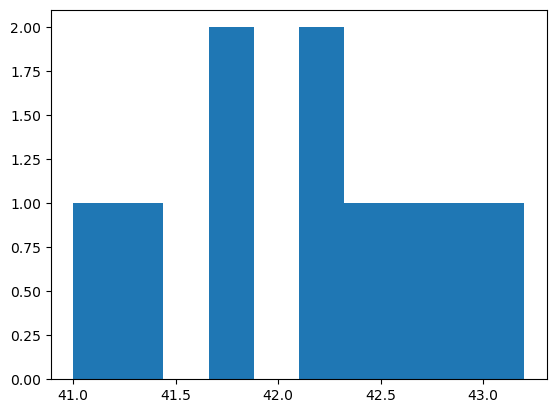

In [14]:
plt.hist(packing['New machine'])
plt.show()

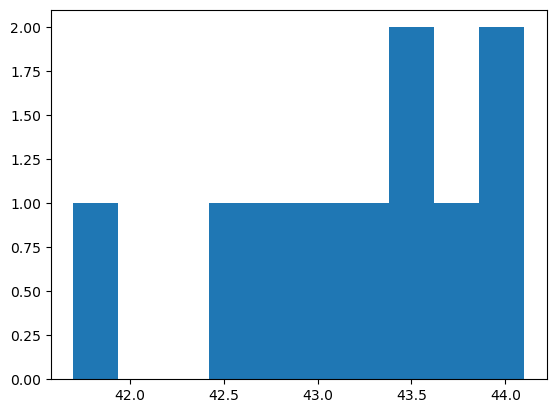

In [15]:
plt.hist(packing['Old machine'])
plt.show()

In a packing plant, a machine packs cartons with jars. It is supposed that a new machine will pack faster on the average than the machine currently used. 
To test that hypothesis, the times it takes each machine to pack ten cartons are recorded. 
Assume that there is sufficient evidence to conduct the t test, does the data provide sufficient evidence to show if one machine is better than the other

**Null Hypothesis**

There is no significant difference between the mean of the old machine and the new machine.

**Alternative Hypothesis**

The mean from the new machine is higher to the mean of the old machine.

**Level of Significance (alpha)**

We assume an alpha of 0.05


In [16]:
t_stat, p_value = stats.ttest_ind(packing['Old machine'], packing['New machine'])

In [17]:
t_stat, p_value

(3.3972307061176026, 0.0032111425007745158)

### Evaluate for one sided t-test

In [18]:
print('The p value is', p_value/2, '- which is smaller than alpha 0.05')

The p value is 0.0016055712503872579 - which is smaller than alpha 0.05


### Conclusion

Given that the p value is smaller than our preset alpha of 0.05 we can reject the Null Hypothesis in favour of the Alternative Hypothesis. The new machine packs faster on average than the old machine.